<div>
<img src="figures/svtLogo.png"/>
</div>

<h1><center>Mathematical Optimization for Engineers</center></h1>
<h2><center>Bonus exercise 3 </center></h2>

## Background
### Optimal control problems

$$\newcommand{\R}{\mathbb R}$$
In this programming exercise, you will solve an optimal control problem (OCP). OCPs are a special case of dynamic optimization problems. For this exercise, we introduce the following class of optimal control problems:

\begin{align}
	\min_{\mathbf{x}(\cdot),\mathbf{u}(\cdot)}  & \Phi(\mathbf{x}(\cdot)) = \mathbf{\phi}(\mathbf{x}(t_f)) \\
	\mbox{s.t. }\quad & \dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t),\mathbf{u}(t)), \; t \in [t_0,t_f], \\
    &\mathbf{x}(t_0) = \mathbf{x_0}, \\
	&\mathbf{u}_{\min}  \leq \mathbf{u}(t) \leq \mathbf{u}_{\max} \; \forall \; t \in [t_0,t_f].
\end{align}
    
The state variables $\mathbf{x}(t) \in \R^{n_x}$ and control variables $\mathbf{u}(t) \in \R^{n_u}$ are time-dependent. The so-called Mayer-type objective functional $\Phi$ is defined by the function $\mathbf{\phi} : \R^{n_x} \rightarrow \R$, that only depends on the state $\mathbf{x}(t)$ at the final time $t_f$. The constraints are a system of ordinary differential equations (ODE). The right hand side of the ODE is given by the function $\mathbf{f}:\R^{n_x}\times \R^{n_u} \rightarrow \R^{n_x}$. Finally, we consider control path constraints in form of simple lower and upper bounds $\mathbf{u}_{\min} \in \R^{n_u}$ and $\mathbf{u}_{\max} \in \R^{n_u}$ on $\mathbf{u}(t)$, respectively.

The dimension of the optimization problem is infinite, since for every $t\in [t_0,t_f]$, $\mathbf{u}(t)$ and $\mathbf{x}(t)$ are optimization variables.

For fixed $\mathbf{u}(\cdot)$, the state variables $\mathbf{x}(t),\,t\in [t_0,t_f]$ are uniquely determined by the solution of the initial value problem. Thus, the control vector function $\mathbf{u}:[t_0,t_f] \rightarrow \R^{n_u}$  is the actual (infinite-dimensional) degree of freedom.

### Full discretization approach

$$\newcommand{\R}{\mathbb R}$$
The so-called full discretization approach discretizes state and control variables, as well as the differential equations. Thus, the original optimal control problem is transformed into an ordinary nonlinear program (NLP). Here, we will use the <u>implicit Euler method</u> to discretize the ODE into a set of nonlinear equations. The procedure to obtain a nonlinear program is now described in detail:

The first step is to divide the time horizon $[t_0,t_f]$ into $M$ intervals $[t_{k-1},t_k]$, $k=1,\dots, M$ of length $h$ with

$
t_M = t_f, \qquad t_k - t_{k-1} = h, \, k=1,\dots, M, \qquad h = \frac{t_f-t_0}{M}.
$

The implicit Euler discretization is then
\begin{equation}\label{eq:euler}
\mathbf{x}_{k+1} = \mathbf{x}_k + h \cdot \mathbf{f}(\mathbf{x}_{k+1},\mathbf{u}_{k+1}), \quad k=0,1,\dots,M-1,
\end{equation}

where $\mathbf{x}_{k}\in \R^{n_x}$ and $\mathbf{u}_k\in \R^{n_u}$ are finite dimensional decision variables that approximate the states $\mathbf{x}(t)$ and controls $\mathbf{u}(t)$, respectively, at the discretization points
$t_k$, $k=1,2,\dots,M$.

$$\newcommand{\R}{\mathbb R}$$
The optimization variable vector of the full discretization NLP is 

\begin{align}
\mathbf{y} = \left(\begin{array}{c}
\mathbf{x}_1\\
\mathbf{u}_1\\
\mathbf{x}_2\\
\mathbf{u}_2\\
\vdots \\
\mathbf{x}_M\\
\mathbf{u}_M
\end{array} \right) \in \R^{n_y}, \quad \text{where } n_y = M\cdot(n_x+n_u).
\end{align}

The full discretization NLP is

\begin{align}
\min_{\mathbf{y} \in \R^{n_y}} & \phi(\mathbf{x}_M) \\
\text{s.t.}\quad & \mathbf{c}_k(y) = \mathbf{0}, \quad k=0,1,\dots, M-1 \\
& \mathbf{u}_{\min} \le \mathbf{u}_k \le \mathbf{u}_{\max}, \quad k=1,\dots,M,
\end{align}

where the constraint functions $\mathbf{c}_k: \R^{n_y} \rightarrow \R^{n_x}$, $k=0,1,\dots,M-1$ are defined by:
$
\mathbf{c}_k(\mathbf{y}) := \mathbf{x}_{k+1} - \mathbf{x}_k - h \cdot \mathbf{f}(\mathbf{x}_{k+1},\mathbf{u}_{k+1}).
$

## Problem description

We consider reactions inside a cylindrical fixed bed reactor:
<br>
<br>
<div>
<img src="figures/fixedBed.png" width="500"/>
</div>


For modelling purposes, think of it as a cylndrical tube, filled with catalyst pellets (bed), with reactants flowing through the bed and being converted into products. The reactant enters the reactor on the inflow side, reacts inside the reactor and leaves together with the products on the outflow side.
<br>
<br>
<div>
<img src="figures/TubularReactor-001.png" width="400"/>
</div>

We additionally assume the fluid velocity inside the cylinder to be uniform over a cross-section $A_c$, the flow to be in steady-state and the density of the fluid to be constant.

In our problem, the reactions inside the reactor can be described by the following chemical equation:
<br>
<br>
<div>
<img src="figures/catReaction.png" width="150"/>
</div>

The reactions are catalysed - the reversible step from species $A$ to intermediate species $B$, $A  \rightleftharpoons B$, is dependent on catalyst 1 and the irreversible step from $B \rightarrow C$ is dependent on catalyst 2. 

The objective is to maximize the amount of $C$ at the outflow by adjusting the mixture of catalysts at all positions $t$ on the bed. The control variable, $u(t)$, is the fraction of catalyst 1 and consequently, $(1-u(t))$ is the fraction of catalyst 2 on the cross-section of the bed, at position $t$. 

It is important to remark, that the variable $t$ does not represent the time in this problem, but the spatial dimension in direction of the reactor axis.

To solve the problem using full-discretization, we first discretize the 1-dimensional space as shown:
<br>
<br>
<div>
<img src="figures/TubularReactor-002.png" width="400"/>
</div>
<br>
<br>
The equations below show the mathematical formulation of this setting:<br> 
<i>(Hint: The flow is assumed uniform and steady, so the space and time derivatives are interchangeable with the help of a constant. You can assume the constant flow speed to be $1m/s$ and the length of the reactor, $t_f = 1m$)</i>:

\begin{align}
\begin{split}
\frac{d x_A(t)}{d t} &= u(t) \cdot (k_2x_B(t) - k_1x_A(t))\\
\\
\frac{d x_B(t)}{d t} &= -u(t) \cdot (k_2x_B(t)-k_1x_A(t))-(1-u(t))\cdot k_3 x_B(t)\\
\\
x_C(t) &= 1-x_A(t)-x_B(t), \; \; t \in [t_0,t_f] \\
\\
u_{min} \; &\le \; u(t) \; \le \; u_{max} \; \forall \; t \in [t_0,t_f]\\
\\
\mathbf{\phi}(x_A(t_f)&, x_B (t_f))=x_C(t_f) = 1-x_A(t_f)-x_B(t_f)
\end{split}
\end{align}
<br>
<br>
$x_A(t)$ and $x_B(t)$ are the unknown mole fractions of the educts $A$ and $B$ at position $t$, where $t$ is the distance from the inflow.

$k_1$, $k_2$ and $k_3$ are the velocity constants of reactions $1$, $2$ and $3$. In the following, the values $k_1=k_3=1$, $k_2=10$, $t_0=0$ and $t_f=1$ shall be used. 

As stated before the control variable $u$ represents the mole fraction of  catalyst 1, therefore $u_{min}=0$ and $u_{max}=1$.

The inflow only consists of reactant $A$. So the last piece of information needed to solve this problem are the initial conditions:
\begin{align}
\begin{split}
{x}_A(t_0) &= 1\\
{x}_B(t_0) &= 0.\label{initialvalue}
\end{split}
\end{align}

The goal is to maximize the mole fraction of product $C$, namely 
$
x_C(t_f) = \phi(x_A(t_f), x_B (t_f)) =
1-x_A(t_f)-x_B(t_f)
$
at the final position ($t_f = 1$).

### Your task

1. Set up the nonlinear program by applying full discretization.
<br>
<br>
2. Solve the nonlinear optimization problem using the solver SLSQP. Use the value $0.5$ as initial guess for $u_k$, and $(1,0)^T$ (why?) as an initial guess for $x_k$.

#### Hint

The computed optimal objective function values for $M=10$, $M=30$ and $M=50$ are
0.0450, 0.0468 and 0.0472, respectively.

<u>You must use the template below, for submission.</u> 
<br>
<br>
- As a rule of thumb, you <b>only add code</b> to this file and <b> do not delete or change anything in the template</b>.
<br>
<br>
- To see where you can add code, go ahead and do a search (ctrl+f) for '# YOUR CODE HERE'
<br>
<br>
- Once you have added your code at these spots, delete the subsequent 'raise NotImplementedError()'. These exist only to remind you to add your own code.
<br>
<br>
- Most importantly, have fun while programing :)!

In [1]:
import numpy as np

# refer to the documentation of scipy's SLSQP solver to understand these imports
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import NonlinearConstraint

# don't worry about plotting
from matplotlib import pyplot as plt

In [97]:
# Right hand side function of ODE (10 points)

# inputs: state and control vectors, x and u, as numpy arrays

# output: RHS vector, f, as numpy array

def eval_rhs(x, u):
    # constants
    k1 = 1
    k2 = 10
    k3 = 1
    
    f = np.zeros(2)
    
    xA = x[0]
    xB = x[1]
    
    # YOUR CODE HERE
    f[0] = u * (k2*xB - k1*xA)
    f[1] = -u * (k2*xB - k1*xA) - (1-u) * (k3*xB)
    
    return f

eval_rhs([1,2], 3)

array([ 57., -53.])

In [3]:
# please leave this cell as it is

In [78]:
# equality constraints for optimization - discretized ODE (50 points)

# inputs: 
#  1. optimization variable vector of the full-discretization NLP, y, as numpy array
#  2. number of discretization intervals, M, as integer

# output: 
#  1. vector of evaluated contraint expressions, c_k(y) for all k = 0,1 ... ,M-1, as numpy array
#
#  Note - Please ensure that the output is in the format (c_0', c_1', c_2', ... , c_M-1')' i.e. all column vectors 
#         c_k(y) are vertically collated into one big column vector, ceq, in the order shown.

def cons(y, M):
    # YOUR CODE HERE
    h = 1/M
    y_0 = np.concatenate([np.array([1, 0, 0.5]), y])
    
    ceq = np.zeros(2*M)
    
    for i in range(M):
        y_sub = y_0[i*3:]
        x_i = y_sub[0:2]
        x_i1 = y_sub[3:5]
        u_i1 = y_sub[5]
        
        # print("----------------------------i", i)
        # print("xi1", x_i1)
        # print("xi", x_i)
        # print("ui", u_i1)
        # print("eval_rhs", eval_rhs(x_i1, u_i1))
        ceq[i*2:i*2+2] = x_i1 - x_i - h * eval_rhs(x_i1, u_i1)
    
    return ceq

# cons(np.array([1. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,  0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,  0. , 0. , 0. , 0. ]), 10)
cons(np.array([1.94016624e-15, 3.72434042e-12, 5.00000000e-01, 3.68973305e-12,
       3.32649040e-14, 1.78178104e-02, 9.79241844e-13, 2.25260722e-12,
       5.26689429e-01, 2.92764502e-12, 7.55099803e-16, 1.86200880e-02,
       2.42245324e-15, 2.39090877e-12, 5.23748879e-01, 2.39285953e-12,
       4.29487606e-16, 1.72638812e-02, 2.27322654e-12, 1.43117814e-13,
       5.22501093e-01, 2.41426407e-12, 3.51720108e-16, 1.69691861e-02,
       2.41014689e-12, 3.52688426e-16, 5.12796835e-01, 2.10606272e-15,
       1.87475264e-12, 1.12190895e-02]), 10)

array([-1.00000000e+00,  5.77263064e-12,  3.69377447e-12, -3.69378989e-12,
       -3.84533998e-12,  3.46080937e-12,  1.95384042e-12, -2.25721526e-12,
       -4.17733148e-12,  3.75612988e-12,  2.39456067e-12, -2.39456066e-12,
       -7.56358691e-14,  1.05525065e-13,  1.45128371e-13, -1.46822360e-13,
        1.19293532e-13, -1.23392561e-13, -2.42907148e-12,  2.08080257e-12])

In [31]:
# please leave this cell as it is

In [53]:
# objective function (10 points)

# inputs: 
#  1. optimization variable vector of the full-discretization NLP, y, as numpy array

# output: 
#  1. objective function value 

def objective(y):

    # YOUR CODE HERE
    x_Af = y[-3]
    x_Bf = y[-2]
    obj = - (1 - x_Af - x_Bf)
    
    return obj

In [92]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 4)

def do_plot(y):
    y0 = np.concatenate([[1,0,0.5],y])
    t_all = np.arange((len(y0)/3)) / (len(y)/3)
    plt.subplot(131)
    plt.plot(t_all, y0[0::3])
    plt.title('xA')

    plt.subplot(132)
    plt.plot(t_all, y0[1::3])
    plt.title('xB')

    plt.subplot(133)
    plt.plot(t_all[1:], y[2::3])
    plt.title('u')

    plt.tight_layout()
    plt.show()

In [93]:
# please leave this cell as it is

  NIT    FC           OBJFUN            GNORM
    1   122    -4.410447E-02     1.414214E+00
    2   243    -4.038734E-02     1.414214E+00
    3   364    -4.042281E-02     1.414214E+00
    4   485    -4.058912E-02     1.414214E+00
    5   606    -4.138057E-02     1.414214E+00
    6   727    -4.233867E-02     1.414214E+00
    7   848    -4.238066E-02     1.414214E+00
    8   969    -4.286752E-02     1.414214E+00
    9  1090    -4.425876E-02     1.414214E+00
   10  1212    -4.420295E-02     1.414214E+00
   11  1333    -4.424718E-02     1.414214E+00
   12  1454    -4.469606E-02     1.414214E+00
   13  1575    -4.495581E-02     1.414214E+00
   14  1696    -4.513574E-02     1.414214E+00
   15  1817    -4.555026E-02     1.414214E+00
   16  1938    -4.554434E-02     1.414214E+00
   17  2059    -4.558245E-02     1.414214E+00
   18  2180    -4.565351E-02     1.414214E+00
   19  2301    -4.580075E-02     1.414214E+00
   20  2422    -4.579291E-02     1.414214E+00
   21  2543    -4.582245E-02     1

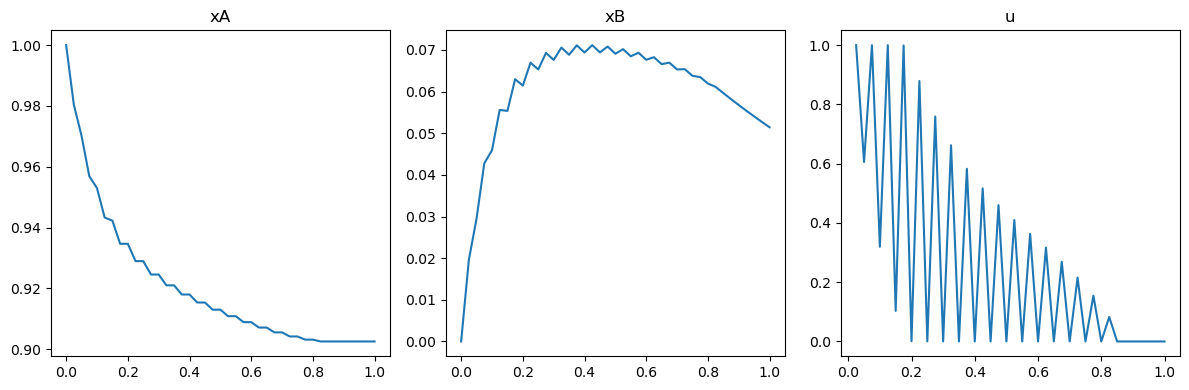

(-0.04597454593693168, array([9.80392157e-01, 1.96078431e-02, 1.00000000e+00, 9.70175685e-01,
       2.95330829e-02, 6.05556836e-01, 9.56943432e-01, 4.27653349e-02,
       1.00000000e+00, 9.52997445e-01, 4.59301721e-02, 3.19708090e-01,
       9.43317137e-01, 5.56104804e-02, 1.00000000e+00, 9.42314786e-01,
       5.53713697e-02, 1.03174789e-01, 9.34700503e-01, 6.29841695e-02,
       9.99057655e-01, 9.34692889e-01, 6.14568243e-02, 9.51383018e-04,
       9.28991065e-01, 6.69563382e-02, 8.79138912e-01, 9.28991065e-01,
       6.53232568e-02, 1.43360326e-18, 9.24595761e-01, 6.93013276e-02,
       7.59177517e-01, 9.24595761e-01, 6.76110513e-02, 1.21295118e-18,
       9.21032539e-01, 7.05781578e-02, 6.62152558e-01, 9.21032539e-01,
       6.88567393e-02, 8.31680475e-20, 9.18020341e-01, 7.11270308e-02,
       5.82771096e-01, 9.18020341e-01, 6.93922252e-02, 1.25149118e-19,
       9.15388624e-01, 7.11640326e-02, 5.16660413e-01, 9.15388624e-01,
       6.94283244e-02, 0.00000000e+00, 9.13033347e-01,

In [99]:
# main function (30 points)

# inputs: 
#  1. number of discretization intervals, M, as integer

# output: 
#  1. optimal objective function value 
#  2. optimal variable vector, y, as numpy array

def run_optimization(M):
    n = 3*M
    x_guess = np.zeros(n)  # initial guess of optimzation variable

    x_guess[0::2] = 1
    x_guess[1::2] = 0
    x_guess[2::2] = 0.5
    
    x_initial = np.array([1, 0])

    lb = np.zeros(n)
    ub = np.ones(n)
    
    bounds = Bounds(lb, ub)
    
    consWithInitial = lambda y: cons(y, M)
    nonlinear_constraints = NonlinearConstraint(consWithInitial, 0, 0)
    
    # YOUR CODE HERE
    res = minimize(objective, x_guess, bounds = bounds, method='SLSQP', constraints=[nonlinear_constraints],
               options={"maxiter": 10000, 'iprint': 2, 'disp': True})
    
    objopt = objective(res.x)
    yopt = res.x
    do_plot(yopt)
    return objopt, yopt


print(run_optimization(40))

In [ ]:
# please leave this cell as it is